# Notebook to see how metrics do on the second pilot cohort

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore, skew,kurtosis
from scipy.signal import welch, find_peaks
import json
import pandas as pd

## run pilot 2

In [ ]:
#with open('thresholded_pilots_ru_dm_list.txt', 'r') as file:
with open('pilots2_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

## load first pilots r2
#for fd_thresh in [0.7,0.5,0.3]:

for sub in good_subjects_list:
    #print(f'SUB-{sub} NO V1******************')
    %run pilot.py -s $sub -p a4a5 -f concatspeech -d 0 -r
    print(f'****************++++++****************++++++****************++++++*************')


## load second pilots r2



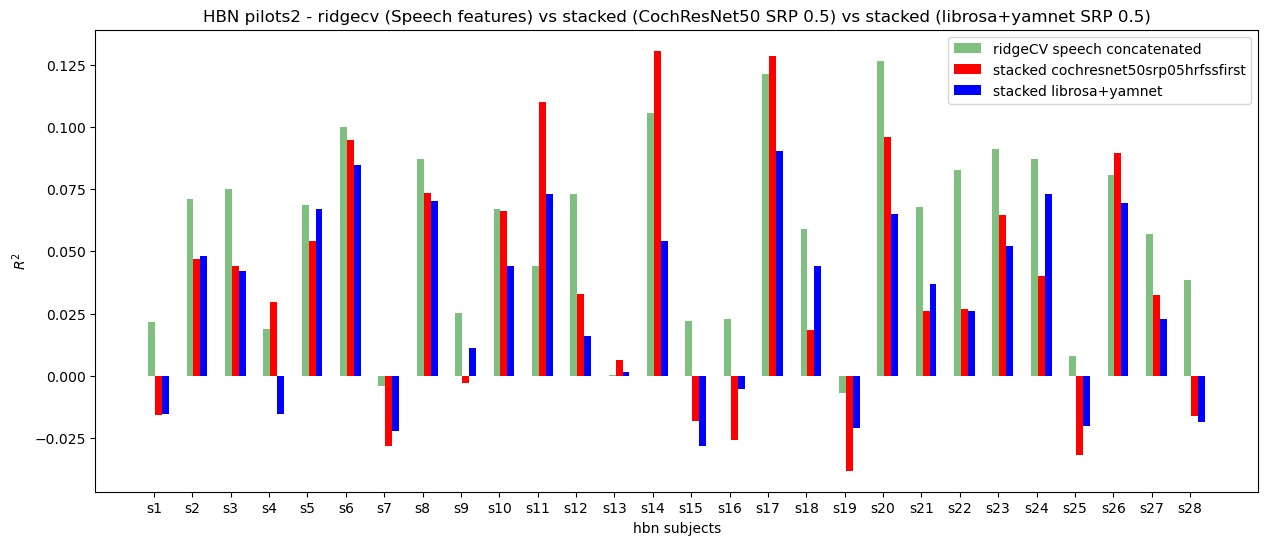

/tmp/ipykernel_2916047/2133267551.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


[Text(0, 0, 'ridgeCV speech concatenated'),
 Text(1, 0, 'stacked cochresnet50srp05hrfssfirst'),
 Text(2, 0, 'stacked librosa+yamnet')]

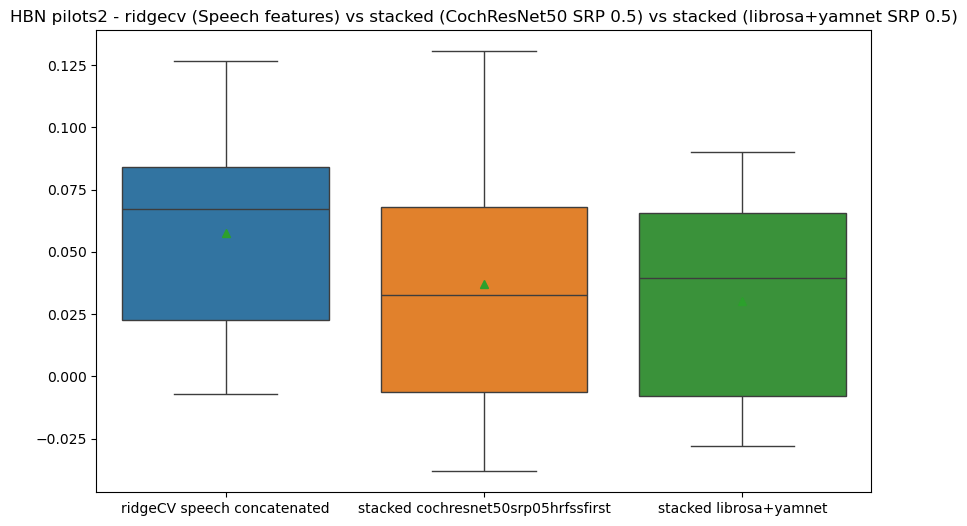

In [4]:
# r2_old=[]
r2_ridgeCV_speech=[]
r2_crn50=[]
r2_manual=[]

v2='manualhrf_srp05'
v1='cochresnet50srp05hrfssfirst'
for sub in good_subjects_list:
    # loaded=np.load(f'../good_pilots/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    # r2_censored.append(np.mean(loaded['stacked_r2s']))
    try:
        # dataload=np.load(f'../good_pilots/sub-{sub}_roi-a4a5_feat-{v}_delay-0.npz')
        # r2_old.append(np.mean(dataload['stacked_r2s'],axis=0))
        dataload=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-{v1}_delay-0.npz')
        r2_crn50.append(np.mean(dataload['stacked_r2s'],axis=0))



        loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
        r2_ridgeCV_speech.append(np.mean(loaded['stacked_r2s']))
        # r2_censored_train.append(np.mean(loaded['train_r2_list']))
        loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-{v2}_delay-0.npz')
        r2_manual.append(np.mean(loaded['stacked_r2s']))
        #r2_new_train.append(np.mean(loaded['train_r2_list']))
    
    except:
        print(f'skip{sub}')


    
    # r2_censored_train.append(np.mean(loaded['train_r2_list']))
    # loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    # r2_new.append(np.mean(loaded['stacked_r2s']))
    # r2_new_train.append(np.mean(loaded['train_r2_list']))




# Number of groups
N = len(r2_crn50)

# List of all lists
#data = [[f/max(r2_list_sorted) for f in r2_list_sorted], [f/max(noise_ceiling_sorted) for f in noise_ceiling_sorted], [f/max(mriqc_fd_mean_list_sorted) for f in mriqc_fd_mean_list_sorted], [f/max(mean_fd_sorted) for f in mean_fd_sorted]]
#data=[r2_censored,r2_new,r2_censored_train,r2_new_train]
data=[r2_ridgeCV_speech,r2_crn50,r2_manual]

# r2_old=[]
# r2_new=[]
# ridgeCV_old=[]
# ridgeCV_new=[]
# Number of bars in each group
num_bars = len(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Set the positions of the groups and width of the bars
ind = np.arange(N)
width = 0.18
#labels=['$R^2$',f'Subject Specific Mean Noise Ceiling (r={noise_ceiling_r:.02f})',f'MRIQC mean FD (r={mriqc_fd_mean_list_r:.02f})', f'fMRIPrep Mean FD (r={mean_fd_r:.02f})']
labels=['ridgeCV speech concatenated','stacked cochresnet50srp05hrfssfirst','stacked librosa+yamnet']
# Create bars for each list
alphas=[0.5,1,1]
colors=['g','r','b','blue']
for i, lst in enumerate(data):
    ax.bar(ind + i*width, lst, width, label=f'{labels[i]}', alpha=alphas[i],color=colors[i])

title='HBN pilots2 - ridgecv (Speech features) vs stacked (CochResNet50 SRP 0.5) vs stacked (librosa+yamnet SRP 0.5)'
# Add labels, title, and legend
ax.set_xlabel('hbn subjects')
ax.set_ylabel('$R^2$')
ax.set_title(title)
ax.set_xticks(ind + width / num_bars)
ax.set_xticklabels([f's{i+1}' for i in range(N)])
ax.legend()

# Show the plot
plt.show()





fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data,showmeans=True)
plt.title(title)
ax.set_xticklabels(labels)